# **TUGAS KELOMPOK PRAKTIKUM 4 PEMBELAJARAN MESIN**

**Kelompok 8 (RB)**\
**Anggota Kelompok :**

1. Kanaya Dea Thalita Akhmad (121450001)
2. Sarah Natalia Geraldine (121450022)
3. Yunike Priskila Sitorus Pane (121450071)
4. Meinisa (121450076)
5. Revaldo Dafa Fahmindo (121450085)
6. Ibnu Farhan Al-Ghifari (121450121)
7. Yunita Amelia Puspitasari (121450118)






## **Rancangan Pemodelan:**

1. **Persiapan Dataset:**
   - Dapatkan dataset gambar buah apel dan jeruk dengan jumlah minimum 500 gambar, terbagi secara seimbang (50%:50% atau 250 gambar untuk masing-masing kategori).
   - Lakukan pra-pemrosesan data, termasuk normalisasi intensitas piksel, resizing gambar agar memiliki ukuran seragam (contoh: 128x128 piksel), dan augmentasi data jika diperlukan.

2. **Pembagian Dataset:**
   - Bagi dataset menjadi dua subset: pelatihan (training) dan pengujian (testing).
   - Pastikan setiap subset memiliki jumlah gambar yang seimbang antara kategori buah.

3. **Bangun Arsitektur Model CNN:**
   - Inisialisasi model Sequential.
   - Tambahkan layer Conv2D dengan kernel 3x3, aktivasi ReLU, dan padding 'same' untuk mempertahankan informasi tepi.
   - Tambahkan layer MaxPooling2D dengan ukuran pool 2x2 untuk mereduksi dimensi spasial.
   - Tambahkan beberapa blok Conv2D-MaxPooling2D dengan peningkatan jumlah filter dan dropout untuk mengurangi overfitting.
   - Tambahkan layer Flatten untuk meratakan output ke dalam vektor.
   - Tambahkan layer Dense dengan fungsi aktivasi ReLU.
   - Tambahkan layer output Dense dengan fungsi aktivasi sigmoid (karena ini masalah klasifikasi biner).

4. **Kompilasi Model:**
   - Pilih optimizer, loss function, dan metrik sesuai dengan masalah klasifikasi biner.
   - Contoh: `adam` optimizer, `binary_crossentropy` loss, dan metrik `accuracy`.

5. **Pelatihan Model:**
   - Tentukan jumlah epoch dan ukuran batch untuk pelatihan.
   - Latih model menggunakan subset pelatihan.
   - Gunakan teknik early stopping untuk menghindari overfitting
   - Amati perkembangan akurasi dan loss pada set pelatihan dan validasi.

6. **Evaluasi Model:**
   - Evaluasi model menggunakan subset pengujian untuk mengukur akurasi pada data yang belum pernah dilihat model.
   - Analisis confusion matrix dan metrik evaluasi lainnya.

7. **Prediksi:**
   - Gunakan model untuk membuat prediksi pada gambar buah baru.
   - Implementasikan fungsi untuk memprediksi jenis buah dari gambar.




## **Algoritma**

1. Impor library yang diperlukan
2. Hubungkan ke Google Drive
3. Tentukan path untuk direktori gambar apel dan jeruk
4. Muat dan eksplorasi data: daftar file, tampilkan beberapa sampel, dan cetak jumlah gambar
5. Buat label untuk data
6. Proses data: ubah ukuran, konversi, dan simpan gambar dalam array numpy
7. Bagi dataset menjadi set pelatihan dan pengujian
8. Bangun model CNN
9. Latih model
10. Evaluasi model pada set pengujian
11. Lakukan prediksi pada gambar baru
12. Sebagai alternatif, gunakan MobileNetV2 sebagai model pre-trained
13. Bangun, kompilasi, dan latih model berbasis MobileNetV2
14. Evaluasi model berbasis MobileNetV2 pada set pengujian

## **Pseudocode**

```
Import Libraries

Load and Preprocess Data
    Define preprocess_image(image_path)
        Load image from path
        Resize image to target size
        Convert image to array
        Normalize pixel values to be between 0 and 1
        Return preprocessed image

    Load and preprocess all apple images
    Load and preprocess all orange images
    Create labels for the images (apples: 0, oranges: 1)
    Split data into training and testing sets

Build CNN Model
    Define Sequential model
        Add Conv2D layer with filters, kernel_size, activation, and input_shape for images
        Add MaxPooling2D layer
        Add Flatten layer
        Add Dense layer with activation function
        Add Output layer with activation function

Compile Model
    Compile the model with categorical crossentropy loss, adam optimizer, and accuracy metric

Train Model
    Fit the model on training data with validation split
    Use an appropriate number of epochs and batch size

Evaluate Model
    Evaluate the model on the test data
    Print or visualize the evaluation metrics (accuracy, loss)

Predict Images
    Define predict_image(image_path)
        Preprocess the image
        Expand dimensions to match the input shape expected by the model
        Make a prediction using the trained model
        Display the prediction (apple or orange)

Examples
    Train the model
    Evaluate the model
    Make predictions on new images
```

## **Flowchart**

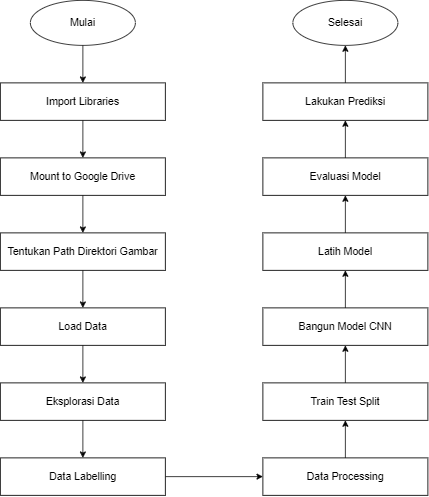

## **Pengerjaan Code CNN**


- Tahap pertama persiapan data dan library

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

- Pastikan terhubung dengan Gdrive masing-masing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_apple = '/content/drive/MyDrive/BUAH/APEL'
path_orange = '/content/drive/MyDrive/BUAH/JERUK'

In [ ]:
#load data files
apple_files = os.listdir(path_apple)
print(apple_files[0:5])
print (apple_files[-5:])

orange_files = os.listdir (path_orange)
print(orange_files [0:5])
print(orange_files[-5:])

print(f'Number of apple images:{len(apple_files)}')
print(f'Number of orange images:{len(orange_files)}')

['image3.jpeg', 'image.jpeg', 'image2.jpeg', 'image6.jpeg', 'image15.jpeg']
['images384.jpg', 'images395.jpg', 'images397.jpg', 'images387.jpg', 'images399.jpg']
['image14.jpeg', 'data.jpeg.webp', 'manfaat-buah-jeruk.width-800.format-webp.webp', 'x-khasiat-buah-jeruk-bagi-tubuh-selama-puasa.jpg', 'Manfaat-Buah-Jeruk.png']
['png-transparent-two-round-orange-fruits-orange-orange-free-natural-foods-food-image-file-formats.png', 'Healthy-Inspiration-19Nov_web.jpg', '62d19bd75befa-jeruk.jpg', 'pngtree-orange-fruit-vitamin-png-image_6291941.jpg', 'pngtree-orange-fruit-with-leaf-png-image_8250537.png']
Number of apple images:250
Number of orange images:250


Mengeksplorasi data gambar dalam dua direktori yang berbeda, yaitu path_apple dan path_orange. Pertama, menggunakan modul os, list dari nama file dalam masing-masing direktori diambil dan dicetak lima file pertama dan lima file terakhir dari setiap direktori. Selanjutnya, jumlah total file gambar dalam setiap kategori dicetak.

- Membuat label pada data

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
250
250
500
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


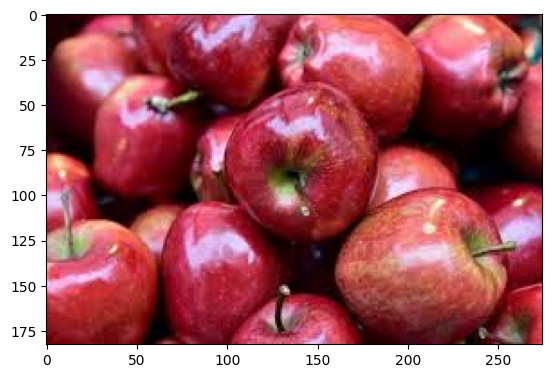

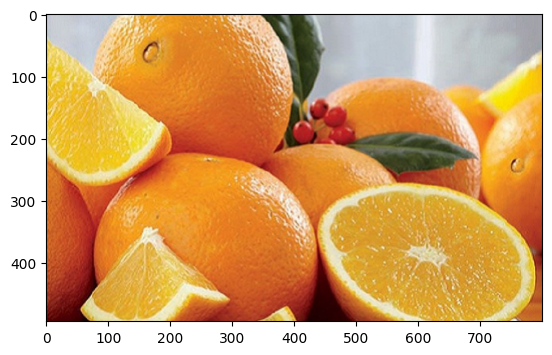

In [ ]:
apple_files = [1]*len(apple_files)
orange_files = [0]*len(orange_files)
print(apple_files[0:5]),print(orange_files[0:5])
print(len(apple_files)),print(len(orange_files))

labels = apple_files + orange_files
print(len(labels))
print(labels[0:5])
print(labels[-5:])

# displaying apple image
img = mpimg.imread(path_apple + '/images242.jpg')
implot = plt.imshow(img)
plt.show()

# displaying orange image
img = mpimg.imread(path_orange + '/images222.jpg')
implot = plt.imshow(img)
plt.show()

Menyiapkan label yang sesuai dengan data gambar yang akan digunakan dalam pelatihan model. Dua list, apple_files dan orange_files, dibuat dan diisi dengan nilai 1 dan 0 secara sesuai. Panjang kedua list ini disesuaikan dengan jumlah file gambar dalam set data "apple" dan "orange". Setelah itu, kedua list tersebut di-print untuk menunjukkan lima elemen pertama dari masing-masingnya, dan total panjangnya dicetak. Selanjutnya, label-label ini digabungkan menjadi satu list tunggal yang disebut labels, mewakili kategori apel (1) dan jeruk (0). Panjang total dari list labels dicetak, dan lima elemen pertama serta lima elemen terakhirnya juga dicetak. Terakhir, dua gambar (apel dan jeruk) dari direktori yang sesuai ditampilkan untuk memberikan gambaran visual tentang data yang akan digunakan dalam pelatihan model.

- Pemrosesan data

In [ ]:
data = []

apple_files = os.listdir(path_apple)

for img_file in apple_files:
  image = Image.open(path_apple + '/' + str(img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

orange_files = os.listdir (path_orange)

for img_file in orange_files:
  image = Image.open(path_orange + '/' + str(img_file))
  image = image.resize((128,128))
  image = image.convert ('RGB')
  image = np.array(image)
  data.append(image)

type (data),len(data)

data[0]

# converting image list and label list to numpy arrays
x = np.array(data)
y = np.array(labels)

Kode ini berfungsi untuk memproses gambar pada dua set data yang berbeda (apel dan jeruk) dan menyimpannya dalam bentuk array untuk keperluan pelatihan model. Pertama, file gambar pada direktori yang apel (path_apple) diambil dan diubah menjadi array menggunakan modul Image dari library PIL. Setiap gambar kemudian diubah ukurannya menjadi 128x128 piksel dan dikonversi menjadi mode warna RGB. Proses yang sama juga diulang untuk gambar pada direktori jeruk (path_orange). Setiap array gambar kemudian ditambahkan ke dalam list data. Akhirnya, list ini diubah menjadi array numpy dengan nama x. Dengan asumsi bahwa sebelumnya ada label yang sesuai untuk setiap gambar (misalnya, labels), array label tersebut juga diubah menjadi array numpy dengan nama y.

- Train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print (x.shape, x_train.shape, x_test.shape)

x_train_scaled = x_train/255
x_test_scaled = x_test/255
x_train[0],x_train_scaled[0]

(500, 128, 128, 3) (400, 128, 128, 3) (100, 128, 128, 3)


(array([[[194, 228, 243],
         [201, 230, 244],
         [208, 232, 245],
         ...,
         [220, 232, 243],
         [222, 236, 253],
         [142, 152, 172]],
 
        [[195, 228, 243],
         [201, 230, 243],
         [209, 232, 245],
         ...,
         [220, 235, 247],
         [220, 234, 251],
         [118, 128, 148]],
 
        [[197, 230, 242],
         [204, 232, 243],
         [212, 234, 245],
         ...,
         [217, 234, 248],
         [213, 230, 245],
         [121, 134, 152]],
 
        ...,
 
        [[221, 233, 245],
         [222, 233, 244],
         [223, 234, 245],
         ...,
         [ 91,  80,  35],
         [131, 121,  62],
         [ 67,  69,  46]],
 
        [[211, 232, 246],
         [214, 233, 245],
         [218, 234, 243],
         ...,
         [121, 113,  41],
         [113, 106,  61],
         [ 42,  45,  24]],
 
        [[211, 232, 245],
         [214, 232, 244],
         [218, 234, 243],
         ...,
         [154, 148,  60],
  

Kode tersebut mengimplementasikan proses pembagian dataset menjadi data pelatihan (x_train, y_train) dan data pengujian (x_test, y_test) menggunakan fungsi train_test_split dari scikit-learn. Data dibagi dengan rasio 80:20 untuk data pelatihan dan pengujian, dan random_state diatur ke 42 untuk memastikan reproduktibilitas hasil. Hasil cetakan menunjukkan dimensi dari array asli (x), data pelatihan (x_train), dan data pengujian (x_test). Selanjutnya, nilai piksel dalam data pelatihan dan pengujian diukur ulang (scaled) dengan membagi setiap nilai piksel dengan 255, sehingga mendapatkan nilai dalam rentang 0 hingga 1. Cetakannya menunjukkan nilai piksel dari gambar pertama dalam data pelatihan sebelum dan setelah diukur ulang.

- CNN

In [ ]:
num_of_classes = 2
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# training the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=15)

Epoch 1/15
12/12 [==============================] - 14s 1s/step - loss: 1.9798 - acc: 0.5111 - val_loss: 0.6596 - val_acc: 0.8500
Epoch 2/15
12/12 [==============================] - 8s 692ms/step - loss: 0.5187 - acc: 0.7444 - val_loss: 0.7055 - val_acc: 0.6500
Epoch 3/15
12/12 [==============================] - 15s 1s/step - loss: 0.2944 - acc: 0.8861 - val_loss: 0.1171 - val_acc: 0.9500
Epoch 4/15
12/12 [==============================] - 13s 1s/step - loss: 0.2255 - acc: 0.9361 - val_loss: 0.1196 - val_acc: 0.9500
Epoch 5/15
12/12 [==============================] - 12s 984ms/step - loss: 0.1898 - acc: 0.9556 - val_loss: 0.0732 - val_acc: 0.9750
Epoch 6/15
12/12 [==============================] - 14s 1s/step - loss: 0.1829 - acc: 0.9556 - val_loss: 0.0506 - val_acc: 0.9750
Epoch 7/15
12/12 [==============================] - 15s 1s/step - loss: 0.1388 - acc: 0.9667 - val_loss: 0.0349 - val_acc: 1.0000
Epoch 8/15
12/12 [==============================] - 14s 1s/step - loss: 0.1116 - acc:


Kode tersebut mendefinisikan sebuah model neural network menggunakan Keras untuk tugas klasifikasi dengan dua kelas. Model ini terdiri dari dua lapisan konvolusi (Conv2D) dengan masing-masing dilanjutkan oleh lapisan max pooling untuk mengekstraksi dan mereduksi fitur dari gambar input berukuran 128x128 piksel dan tiga saluran warna (RGB). Setelah itu, terdapat dua lapisan Dense (fully connected) dengan aktivasi ReLU dan Dropout untuk mencegah overfitting. Flatten Layer digunakan untuk mengubah tensor menjadi satu dimensi agar dapat dihubungkan ke lapisan Dense. Lapisan output terdiri dari satu neuron untuk setiap kelas dengan aktivasi sigmoid, sesuai dengan masalah klasifikasi biner. Model ini menggunakan fungsi kerugian 'sparse_categorical_crossentropy' karena label kelas bersifat sparse dan optimizer 'adam' untuk mengoptimalkan pembelajaran. Selanjutnya, model dilatih menggunakan data pelatihan yang telah di-scaled (x_train_scaled) dan labelnya (y_train) dengan validasi sebesar 10% dari data pelatihan selama 15 epoch.

- Model Evaluasi

4/4 [==============================] - 1s 130ms/step - loss: 0.0518 - acc: 0.9900
Test Accuracy = 0.9900000095367432


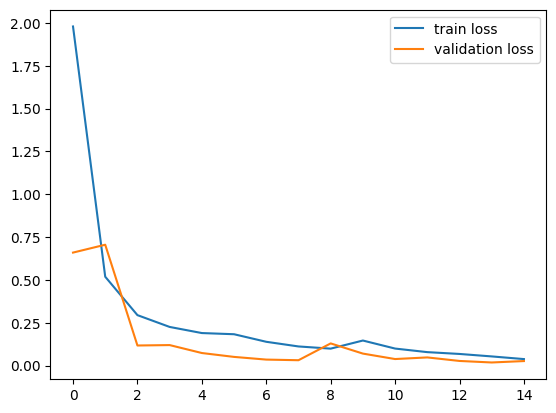

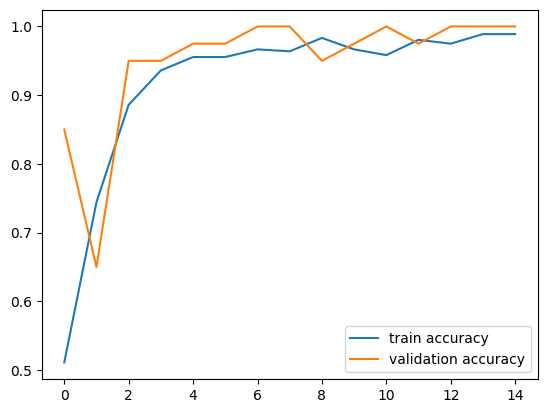

In [ ]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Pertama, kode tersebut mengevaluasi model menggunakan data pengujian (x_test_scaled dan y_test) dan menyimpan hasilnya dalam variabel 'loss' dan 'accuracy'. Nilai akurasi di-print ke layar sebagai metrik performa pada data pengujian. Selanjutnya, hasil pelatihan model yang disimpan dalam variabel 'history' diplot untuk melihat perubahan nilai fungsi loss pada set pelatihan dan validasi. Grafik pertama menunjukkan perubahan nilai loss pada set pelatihan ('train loss') dan validasi ('validation loss'). Grafik kedua memvisualisasikan perubahan nilai akurasi pada set pelatihan ('train accuracy') dan validasi ('validation accuracy'). Plot ini membantu analisis visual terhadap kinerja model selama pelatihan, dan dapat memberikan wawasan terkait overfitting atau underfitting. Dapat diketahui bahwa hasil akurasinya sangat tinggi yaitu 0.9900000095367432

- Sistem Prediksi

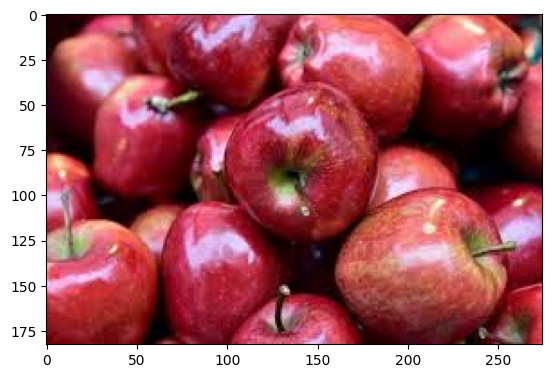

1/1 [==============================] - 0s 62ms/step
[[-1.8008204  4.1471972]]
1
Gambar diatas adalah buah apel.


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

input_image_path = path_apple + '/images242.jpg'
# Membaca gambar dalam format BGR
input_image = cv2.imread(input_image_path)
# Mengubah format BGR ke format RGB
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Menampilkan gambar
imgplot = plt.imshow(input_image_rgb)
plt.show()

input_image_resized = cv2.resize(input_image_rgb, (128, 128))
input_image_scaled = input_image_resized / 255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
    print('Gambar diatas adalah buah apel.')
else:
    print('Gambar diatas adalah buah jeruk.')



Kode tersebut digunakan untuk memprediksi apakah gambar tersebut adalah buah apel atau jeruk. Pertama, memasukkan path gambar yang akan diprediksi. Dalam contoh ini, path tersebut adalah 'path_apple + '/images242.jpg'. Gambar tersebut kemudian dibaca menggunakan OpenCV (cv2) dan ditampilkan menggunakan matplotlib. Selanjutnya, gambar diubah ukurannya menjadi 128x128 piksel, dinormalisasi, dan diubah bentuknya sesuai dengan format yang dapat diproses oleh model neural network. Prediksi kemudian dilakukan dengan menggunakan model yang telah diinisialisasi sebelumnya. Hasil prediksi dicetak dan nilai label prediksi diambil menggunakan np.argmax. Berdasarkan nilai label, program memberikan output berupa informasi apakah gambar tersebut adalah buah apel atau jeruk. Dan hasilnya akurat, yaitu gambar tersebut adalah sekumpulan buah apel.

- Tes akurasi model

In [ ]:
import tensorflow_hub as hub

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(128, 128, 3), trainable=False)

model = tf.keras.Sequential([
      tf.keras.layers.InputLayer(input_shape=(128, 128, 3)),
      tf.keras.layers.Lambda(lambda x: tf.image.resize(x, (224, 224))),
      pretrained_model,
      tf.keras.layers.Dense(num_of_classes)
])

model.summary()

model.compile(
  optimizer = 'adam',
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics = ['acc']
)

model.fit(x_train_scaled, y_train, epochs=15)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_3 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________
Epoch 1/15
13/13 [==============================] - 19s 981ms/step - loss: 0.5602 - acc: 0.7175
Epoch 2/15
13/13 [==============================] - 16s 1s/step - loss: 0.1613 - acc: 0.9625
Epoch 3/15
13/13 [==============================] - 15s 1s/step - loss: 0.0795 - acc: 0.9

Dengan menggunakan KerasLayer dari TensorFlow Hub, model ini dimuat sebagai lapisan dalam model Sequential. Lapisan InputLayer ditambahkan untuk menentukan bentuk input, diikuti oleh Lambda layer untuk meresize gambar input menjadi ukuran yang diharapkan oleh MobileNetV2 (224x224 piksel). Lapisan pretrained_model kemudian dimasukkan, dan lapisan Dense ditambahkan sebagai output layer dengan jumlah neuron yang sesuai dengan jumlah kelas yang ada. Model ini tidak melibatkan proses fine-tuning, karena parameter trainable diatur sebagai False pada pretrained_model. Ringkasan model dan konfigurasi kompilasi ditampilkan menggunakan fungsi summary(). Model menggunakan optimizer Adam, fungsi loss SparseCategoricalCrossentropy (dikonfigurasi untuk tugas klasifikasi), dan metrik akurasi untuk pelatihan. Selanjutnya, model dilatih dengan menggunakan data x_train_scaled dan y_train selama 15 epoch.

- Skor akurasi

In [ ]:
score, acc = model.evaluate(x_test_scaled, y_test)
print(f'Test Loss = {score}')
print(f'Test Accuracy = {acc}')

4/4 [==============================] - 4s 703ms/step - loss: 0.0087 - acc: 1.0000
Test Loss = 0.008653143420815468
Test Accuracy = 1.0


Kode ini digunakan untuk mengevaluasi kinerja model neural network yang telah dilatih pada data pengujian (test set). Variabel x_test_scaled dan y_test mewakili fitur dan label dari data pengujian yang telah dinormalisasi. Metode evaluate digunakan untuk menghitung nilai loss dan akurasi model pada data pengujian. Nilai loss dan akurasi kemudian dicetak menggunakan pernyataan print. Loss merupakan ukuran seberapa baik atau buruk model memprediksi label pada data pengujian, sedangkan akurasi mencerminkan sejauh mana model berhasil mengklasifikasikan data dengan benar. Dan didapatkan hasil Test Loss sebesar 0.008653143420815468 dan Test Acuracy yang sangat akurat yaitu sebesar 1.0